<a href="https://colab.research.google.com/github/arf-berkeley/web_geochemistry/blob/master/OpenContext_Obsidian_Geochem_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uncomment & Install or Upgrade geopandas if necessary
!pip install GeoPandas==0.8.2

     |████████████████████████████████| 972kB 17.2MB/s 
     |████████████████████████████████| 15.3MB 259kB/s 
     |████████████████████████████████| 6.5MB 42.5MB/s 


In [ ]:
!pip install slugify

  Created wheel for slugify: filename=slugify-0.0.1-cp37-none-any.whl size=1909 sha256=64b25a060aaba3d6589180061262a728355d918a2585217f6d9d4b9c6a3b9435
  Stored in directory: /root/.cache/pip/wheels/f9/68/7b/b797d07992b6c7ef1666a59cc79f45fb37aab4344efa6cc3e1
Successfully built slugify


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.1MB 1.3MB/s 


## Important
See the repo  https://github.com/ekansa/open-context-jupyter
You need to Fetch the file api.py 
and then update the cache dir!

In [ ]:
#!wget 'https://raw.githubusercontent.com/ekansa/open-context-jupyter/release/opencontext/api.py'


In [ ]:
# Map to working directory in Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

NameError: ignored

In [ ]:
# Directory is hosted near the root of Google Drive.
# Not sure if this will work outside of my initial google drive. 
# Point to Github instead? Probably not because need a place for the oc-api cache
%run "/content/gdrive/MyDrive/OpenContext-ipynb/api.py"

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

# for mapping
import contextily as cx
import matplotlib.pyplot as plt
import folium

In [ ]:
# Code from https://github.com/ekansa/open-context-jupyter

oc_api = OpenContextAPI()

# Clear old cached records.
#oc_api.clear_api_cache()

# This is a search url for source samples in Peru
url = 'https://opencontext.org/subjects-search/Peru?q=source+sample#6/-13.103/-72.457/10/any/Google-Satellite'

# Fetch the 'standard' (linked data identified) attributes in use with
# data at the url.
stnd_attribs_tuples = oc_api.get_standard_attributes(
    url,
    # The optional argument below gets popular standard
    # zooarchaeological (bone) measurements.
    add_von_den_driesch_bone_measures=True
)

# Now display the standard attributes found in this search / query result
for slug, label in stnd_attribs_tuples:
    print('{}, identified by slug: {}'.format(label, slug))

GET Success for JSON data from: https://opencontext.org/subjects-search/Peru?q=source+sample&prop=oc-zoo-anatomical-meas---oc-zoo-von-den-driesch-bone-meas#6/-13.103/-72.457/10/any/Google-Satellite


In [ ]:
[slug for slug, _ in stnd_attribs_tuples]

['oc-zoo-bd',
 'oc-zoo-dd',
 'oc-zoo-sd',
 'oc-zoo-dd-2',
 'oc-zoo-bp',
 'oc-zoo-gl',
 'oc-zoo-cd',
 'oc-zoo-dp',
 'oc-zoo-bt',
 'oc-zoo-bfd',
 'oc-zoo-ld',
 'oc-zoo-dc',
 'oc-zoo-dl',
 'oc-zoo-ll',
 'biol-term-hastaxonomy',
 'oc-zoo-has-fusion-char',
 'dc-terms-temporal',
 'dc-terms-references',
 'oc-zoo-has-phys-sex-det',
 'wikidata-q247204']

In [ ]:
 # Make a list of only the slugs from the list of slug, label tuples.
stnd_attribs = [slug for slug, _ in stnd_attribs_tuples]

# Make a dataframe by fetching result records from Open Context.
# This will be slow until we finish improvements to Open Context's API.
# However, the results get cached by saving as files locally. That
# makes iterating on this notebook much less painful.
df = oc_api.url_to_dataframe(url, stnd_attribs)

In [ ]:
df.head(2)

uri  \
0  http://opencontext.org/subjects/C8B3BF7C-5EB0-...   
1  http://opencontext.org/subjects/498E9DE2-3DF4-...   

                           citation uri      label item category  \
0  https://n2t.net/ark:/28722/k2pv6dg2x  Bone 2285   Animal Bone   
1  https://n2t.net/ark:/28722/k29p2zf5w  Bone 2283   Animal Bone   

                       project label  \
0  Çatalhöyük Area TP Zooarchaeology   
1  Çatalhöyük Area TP Zooarchaeology   

                                         project uri             published  \
0  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
1  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   

                updated   latitude  longitude  ... Counting measure  DC  DD  \
0  2020-03-28T12:21:22Z  37.668196  32.827191  ...              NaN NaN NaN   
1  2020-03-28T12:21:22Z  37.668196  32.827191  ...              NaN NaN NaN   

   Dd  Dl  Dp  GL  Ld  Ll  SD  
0 NaN NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 46 columns]

In [ ]:
# write to csv so we don't every need to do that again (for some reason not reading from casche)
df.to_csv('oc_query_df_output.csv')

## Mapping the data

In [ ]:
# Make a Geodataframe from the data
gdf = gpd.GeoDataFrame(data=df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs=4326)

In [ ]:
#gdf = gpd.read_file("https://opencontext.org/search/?disc-geotile=12003202211231210&prop=biol-term-hastaxonomy&response=geo-facet&geodeep=5")


<AxesSubplot:>

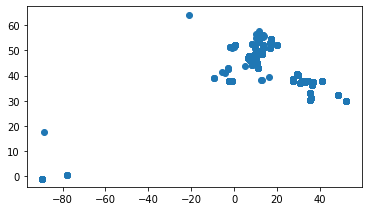

In [ ]:
gdf.plot()

In [ ]:
gdf.head()

uri  \
0  http://opencontext.org/subjects/C8B3BF7C-5EB0-...   
1  http://opencontext.org/subjects/498E9DE2-3DF4-...   
2  http://opencontext.org/subjects/D7B7C14A-5E00-...   
3  http://opencontext.org/subjects/0E2852A1-E031-...   
4  http://opencontext.org/subjects/40B59746-C8C8-...   

                           citation uri       label item category  \
0  https://n2t.net/ark:/28722/k2pv6dg2x   Bone 2285   Animal Bone   
1  https://n2t.net/ark:/28722/k29p2zf5w   Bone 2283   Animal Bone   
2  https://n2t.net/ark:/28722/k2f18vp1t   Bone 4138   Animal Bone   
3  https://n2t.net/ark:/28722/k2pv6d865  Bone 18465   Animal Bone   
4  https://n2t.net/ark:/28722/k25x27f7b  Bone 18464   Animal Bone   

                       project label  \
0  Çatalhöyük Area TP Zooarchaeology   
1  Çatalhöyük Area TP Zooarchaeology   
2  Çatalhöyük Area TP Zooarchaeology   
3  Çatalhöyük Area TP Zooarchaeology   
4  Çatalhöyük Area TP Zooarchaeology   

                                         project uri             published  \
0  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
1  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
2  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
3  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
4  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   

                updated   latitude  longitude  ...  DC  DD    Dd  Dl  Dp  \
0  2020-03-28T12:21:22Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
1  2020-03-28T12:21:22Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
2  2020-03-28T12:27:07Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
3  2020-03-28T13:11:30Z  37.668196  32.827191  ... NaN NaN  24.2 NaN NaN   
4  2020-03-28T13:11:30Z  37.668196  32.827191  ... NaN NaN  19.3 NaN NaN   

     GL  Ld  Ll   SD                   geometry  
0   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  
1   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  
2   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  
3  18.0 NaN NaN  8.3  POINT (32.82719 37.66820)  
4   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  

[5 rows x 47 columns]

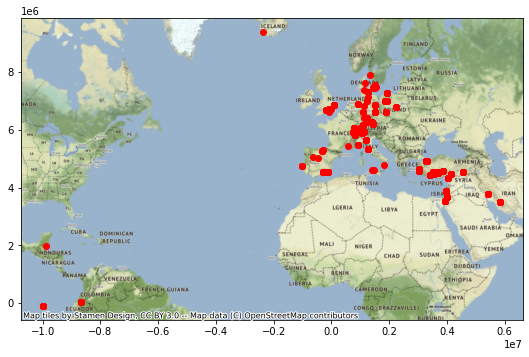

In [ ]:
#map with contextily
ax = gdf[gdf.geometry!=None].to_crs('EPSG:3857').plot(figsize=(9, 9), color="red")
cx.add_basemap(ax)

In [ ]:
gdf[0:10]

uri  \
0  http://opencontext.org/subjects/C8B3BF7C-5EB0-...   
1  http://opencontext.org/subjects/498E9DE2-3DF4-...   
2  http://opencontext.org/subjects/D7B7C14A-5E00-...   
3  http://opencontext.org/subjects/0E2852A1-E031-...   
4  http://opencontext.org/subjects/40B59746-C8C8-...   
5  http://opencontext.org/subjects/EA5C2AA6-8FB4-...   
6  http://opencontext.org/subjects/6F7E02F6-4D28-...   
7  http://opencontext.org/subjects/C31BA1D0-30DB-...   
8  http://opencontext.org/subjects/B2AC0346-F085-...   
9  http://opencontext.org/subjects/0A636251-74AC-...   

                           citation uri       label item category  \
0  https://n2t.net/ark:/28722/k2pv6dg2x   Bone 2285   Animal Bone   
1  https://n2t.net/ark:/28722/k29p2zf5w   Bone 2283   Animal Bone   
2  https://n2t.net/ark:/28722/k2f18vp1t   Bone 4138   Animal Bone   
3  https://n2t.net/ark:/28722/k2pv6d865  Bone 18465   Animal Bone   
4  https://n2t.net/ark:/28722/k25x27f7b  Bone 18464   Animal Bone   
5  https://n2t.net/ark:/28722/k2fq9sc74   Bone 5436   Animal Bone   
6  https://n2t.net/ark:/28722/k20002286  Bone 17828   Animal Bone   
7  https://n2t.net/ark:/28722/k2rb6z55d  Bone 14941   Animal Bone   
8  https://n2t.net/ark:/28722/k2cf9m969  Bone 14996   Animal Bone   
9  https://n2t.net/ark:/28722/k2057fz1d   Bone 9987   Animal Bone   

                       project label  \
0  Çatalhöyük Area TP Zooarchaeology   
1  Çatalhöyük Area TP Zooarchaeology   
2  Çatalhöyük Area TP Zooarchaeology   
3  Çatalhöyük Area TP Zooarchaeology   
4  Çatalhöyük Area TP Zooarchaeology   
5  Çatalhöyük Area TP Zooarchaeology   
6  Çatalhöyük Area TP Zooarchaeology   
7  Çatalhöyük Area TP Zooarchaeology   
8  Çatalhöyük Area TP Zooarchaeology   
9  Çatalhöyük Area TP Zooarchaeology   

                                         project uri             published  \
0  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
1  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
2  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
3  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
4  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
5  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
6  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
7  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
8  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
9  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   

                updated   latitude  longitude  ...  DC  DD    Dd  Dl  Dp  \
0  2020-03-28T12:21:22Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
1  2020-03-28T12:21:22Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
2  2020-03-28T12:27:07Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
3  2020-03-28T13:11:30Z  37.668196  32.827191  ... NaN NaN  24.2 NaN NaN   
4  2020-03-28T13:11:30Z  37.668196  32.827191  ... NaN NaN  19.3 NaN NaN   
5  2020-03-28T12:31:10Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
6  2020-03-28T13:09:29Z  37.668196  32.827191  ... NaN NaN  12.8 NaN NaN   
7  2020-03-28T13:00:57Z  37.668196  32.827191  ... NaN NaN  25.7 NaN NaN   
8  2020-03-28T13:01:08Z  37.668196  32.827191  ... NaN NaN  25.9 NaN NaN   
9  2020-03-28T12:45:17Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   

     GL  Ld  Ll    SD                   geometry  
0   NaN NaN NaN   NaN  POINT (32.82719 37.66820)  
1   NaN NaN NaN   NaN  POINT (32.82719 37.66820)  
2   NaN NaN NaN   NaN  POINT (32.82719 37.66820)  
3  18.0 NaN NaN   8.3  POINT (32.82719 37.66820)  
4   NaN NaN NaN   NaN  POINT (32.82719 37.66820)  
5   NaN NaN NaN  13.9  POINT (32.82719 37.66820)  
6  11.2 NaN NaN   NaN  POINT (32.82719 37.66820)  
7  20.2 NaN NaN   NaN  POINT (32.82719 37.66820)  
8  19.4 NaN NaN   NaN  POINT (32.82719 37.66820)  
9   NaN NaN NaN   NaN  PO

In [ ]:
#map with folium - just 1000 points because big dataset

# map1 = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], 
#                   tiles='CartoDB Positron',
#                   zoom_start=6)

# folium.GeoJson(gdf[gdf.geometry!=None][0:1000],
#                tooltip=folium.GeoJsonTooltip(
#                    fields=['label'], 
#                    aliases=[""],
#                    #labels=True,
#                    localize=True)
#               ).add_to(map1)

# map1  # show map

### Make cluster markers to handline lots of overlapping points

In [ ]:
from folium.plugins import MarkerCluster

# this subsetting is useful if some of the rows do not have geom
gdf2 = gdf[gdf.geometry!=None].copy()
map1 = folium.Map(location=[gdf2.geometry.y.mean(), gdf2.geometry.x.mean()], 
                  tiles='CartoDB Positron',
                  zoom_start=8)


map1.add_child(MarkerCluster(locations=list(zip(gdf2['latitude'], 
                                 gdf2['longitude'])), popups=list(gdf2.label)))

map1

In [ ]:
df.head()
#df['popcontent'] = 

uri  \
0  http://opencontext.org/subjects/C8B3BF7C-5EB0-...   
1  http://opencontext.org/subjects/498E9DE2-3DF4-...   
2  http://opencontext.org/subjects/D7B7C14A-5E00-...   
3  http://opencontext.org/subjects/0E2852A1-E031-...   
4  http://opencontext.org/subjects/40B59746-C8C8-...   

                           citation uri       label item category  \
0  https://n2t.net/ark:/28722/k2pv6dg2x   Bone 2285   Animal Bone   
1  https://n2t.net/ark:/28722/k29p2zf5w   Bone 2283   Animal Bone   
2  https://n2t.net/ark:/28722/k2f18vp1t   Bone 4138   Animal Bone   
3  https://n2t.net/ark:/28722/k2pv6d865  Bone 18465   Animal Bone   
4  https://n2t.net/ark:/28722/k25x27f7b  Bone 18464   Animal Bone   

                       project label  \
0  Çatalhöyük Area TP Zooarchaeology   
1  Çatalhöyük Area TP Zooarchaeology   
2  Çatalhöyük Area TP Zooarchaeology   
3  Çatalhöyük Area TP Zooarchaeology   
4  Çatalhöyük Area TP Zooarchaeology   

                                         project uri             published  \
0  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
1  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
2  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
3  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   
4  http://opencontext.org/projects/02594C48-7497-...  2013-03-02T00:00:00Z   

                updated   latitude  longitude  ...  DC  DD    Dd  Dl  Dp  \
0  2020-03-28T12:21:22Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
1  2020-03-28T12:21:22Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
2  2020-03-28T12:27:07Z  37.668196  32.827191  ... NaN NaN   NaN NaN NaN   
3  2020-03-28T13:11:30Z  37.668196  32.827191  ... NaN NaN  24.2 NaN NaN   
4  2020-03-28T13:11:30Z  37.668196  32.827191  ... NaN NaN  19.3 NaN NaN   

     GL  Ld  Ll   SD                   geometry  
0   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  
1   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  
2   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  
3  18.0 NaN NaN  8.3  POINT (32.82719 37.66820)  
4   NaN NaN NaN  NaN  POINT (32.82719 37.66820)  

[5 rows x 47 columns]

In [ ]:
df.apply()